In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv
/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv
/kaggle/input/hulu-movies-and-tv-shows/hulu_titles.csv


couple of questions for EDA 
* take a look at all the different columns 
* drop the columns that you dont need 


some business questions 
* How many tv shows and movies have started appearing on netflix over the years (both cumulative and non cumulative) 
* Is netflix bringing back old shows/movies? 
* which countries have seen the highest growth in recent years? (Y-O-Y growth) 
* focusing on top 5 countries in terms of number of shows, see the breakdown in no. of tv shows and movies (what is the trend in the type of shows?) 


per data point 
* type --> overall and over the years breakdown 
* Country --> see the overall dist of which has the most number of shows/movies (and/or) then see y-y growth 
* Date added --> breakdown by months and year (when do most shows/movies get released) 
* release year --> check on how many old shows and movies netflix has been releasing on the platform (compare with date added) 
* rating --> breakdown of rating 
* listed_in --> find out the breakdown of genres  
repeat for each streaming platform 


question for across streaming platforms 
* dist of shows and movies across diff platforms
* growth over time overall 
* and in terms of top 5 countries per streaming platform (as %?) 



recommender system 
* building one from the corpus of all the different datasets combined so that we have more data 










#### EDA of the netflix dataset

In [2]:
#read in the netflix dataset 
netflix=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix.shape

(8807, 12)

a total of 8807 shows and movies on netflix currently. For this analysis we wont be looking at the director and cast so we will drop those columns 

In [4]:
netflix=netflix.drop(['director','cast'],axis=1)
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Ok let's start our EDA. First thing is we want to see a breakdown of the number of shows and movies overall. 

In [5]:
#use a simple group by function to determine this 
netflix.groupby('type').agg({'type':'count'})

,type
type,
Movie,6131
TV Show,2676


Clearly alot more movies than tv shows overall. but let's see the breakdown over the years. we will use the date that it was added to netflix. 

In [6]:

#convert the date added into datetime and crate new column for the year of the addition of the show on netflix 
netflix['date_added']=pd.to_datetime(netflix['date_added'])
netflix['date_added_year']=pd.DatetimeIndex(netflix['date_added']).year
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


<AxesSubplot:xlabel='date_added_year'>

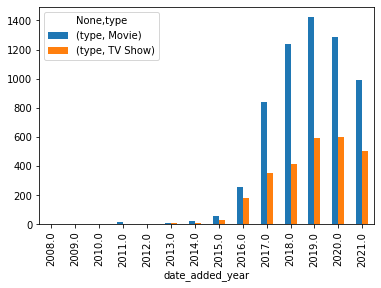

In [7]:
#create a new column called row 
netflix.groupby(['date_added_year','type']).agg({'type':'count'}).unstack().plot(kind = "bar")

What's very interesting is that there is no major difference between the growth between the different types. both saw a spike at around 2019 and a slight decrease following that. 

Lets look at the countries next. 

In [8]:
netflix['country'].isna().sum()

831

Let;s remove the NAs

In [9]:
netflix_country=netflix[netflix['country'].isna()==False]
netflix_country['country'].isna().sum()

0

In [10]:
g=netflix_country.groupby('country').agg({'country':'count'})
g.apply(lambda x: x.sort_values(ascending=False)).head()


,country
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


In [11]:
netflix_country=netflix_country[netflix_country['country']!='United States']
netflix_country=netflix_country[netflix_country['country']!='United Kingdom']


g_2=netflix_country.groupby('country').agg({'country':'count'})
g_2.apply(lambda x: x.sort_values(ascending=False)).head()




    

,country
country,
India,972
Japan,245
South Korea,199
Canada,181
Spain,145


Will not take out Canada as it might contain french movies as well. Ok now let;' see how the trends have been over the years.  

<AxesSubplot:xlabel='date_added_year'>

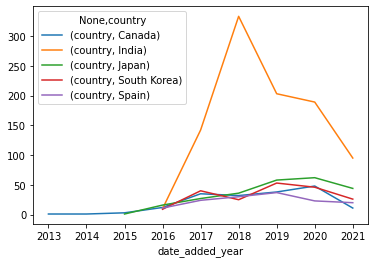

In [12]:
netflix_country_final=netflix_country[netflix_country['country'].isin(['India','Japan','South Korea','Canada','Spain'])]
netflix_country_final.groupby(['date_added_year','country']).agg({'country':'count'}).unstack().plot(kind = "line")

While india saw a boom after 2016, the other 4 countries did see a bit of an incraase too over time. however, not as much as we might have expected. nonetheless it looks like netflix is slowly increasing their number of foriegn filksm over time. 

Let's now look at the trend of when do shows and movies get released. 

In [13]:
import matplotlib.pyplot as plt
#create a new month variable
netflix['month']=pd.DatetimeIndex(netflix['date_added']).month
netflix.head()
#plt.scatter(netflix['date_added_year'], netflix['month'], marker='o')
netflix.groupby(['date_added_year','month']).agg({'month':'count'}).unstack()





month                                                   \
month             1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    
date_added_year                                                           
2008.0             1.0    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
2009.0             NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
2010.0             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011.0             NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
2012.0             NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
2013.0             NaN    NaN    1.0    NaN    NaN    NaN    NaN    1.0   
2014.0             2.0    2.0    NaN    2.0    NaN    1.0    1.0    1.0   
2015.0             1.0    4.0    5.0    5.0    6.0    6.0    7.0    2.0   
2016.0            43.0   15.0   17.0   22.0   13.0   18.0   28.0   34.0   
2017.0            72.0   82.0  125.0   93.0   86.0   94.0   79.0  115.0   
2018.0           129.0   87.0  173.0  115.0   97.0   78.0  152.0  164.0   
2019.0           153.0  148.0  172.0  162.0  139.0  168.0  157.0  131.0   
2020.0           205.0  114.0  137.0  177.0  157.0  156.0  146.0  129.0   
2021.0           132.0  109.0  112.0  188.0  132.0  207.0  257.0  178.0   

                                             
month             9.0    10.0   11.0   12.0  
date_added_year                              
2008.0             NaN    NaN    NaN    NaN  
2009.0             NaN    NaN    1.0    NaN  
2010.0             NaN    NaN    1.0    NaN  
2011.0             1.0   11.0    NaN    NaN  
2012.0             NaN    NaN    1.0    1.0  
2013.0             2.0    3.0    2.0    2.0  
2014.0             1.0    4.0    4.0    6.0  
2015.0             7.0   14.0    4.0   21.0  
2016.0            48.0   51.0   44.0   96.0  
2017.0           113.0  126.0   85.0  118.0  
2018.0           124.0  191.0  154.0  185.0  
2019.0           123.0  193.0  255.0  215.0  
2020.0           168.0  167.0  154.0  169.0  
2021.0           183.0    NaN    NaN    NaN

From this we can see that it is quite varied, but the general trend is thatm ost shows and movies thend to get released at the later part of the year. 

Now let's look the proportion at which netflix brings back old shows. 

In [14]:
#we see if there is a difference between the year of the releas of the movie/tv show and the year it was added to netflix 
netflix['diff_year']=netflix['date_added_year']-netflix['release_year']
netflix[netflix['diff_year']>0]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,month,diff_year
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,1.0
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,28.0
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2021.0,9.0,1.0
17,s18,TV Show,Falsa identidad,Mexico,2021-09-22,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,2021.0,9.0,1.0
21,s22,TV Show,Resurrection: Ertugrul,Turkey,2021-09-22,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,2021.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,12.0
8803,s8804,TV Show,Zombie Dumb,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,1.0
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,10.0
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,14.0


What's interesting is that there is a huge proportion (more than 5000) of old shows/movies being brought into netflix. most likley this does not incluide the netflix originals either.

Let's move on to genres. As there are more than one genre per movie/show, we should try and break it down indivudally and see what are the popular ones.  

In [15]:
netflix_genre=list(netflix['listed_in'])

empty=[]


for x in netflix_genre:
    temp=x.split(', ')
    for y in temp:
        empty.append(y)

empty=pd.DataFrame(empty)
empty.columns=['genre']
group=empty.groupby('genre').agg({'genre':'count'})
group.apply(lambda x: x.sort_values(ascending=False))

,genre
genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


Let's do a quick comparison across the different straming platforms to see how many shows and movies have been added ot the various platforms and hwo they compare among each other 

In [16]:
#import the data of the other streaming platforms 
amazon=pd.read_csv('../input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')
disney=pd.read_csv('../input/disney-movies-and-tv-shows/disney_plus_titles.csv')
hulu=pd.read_csv('../input/hulu-movies-and-tv-shows/hulu_titles.csv')


In [17]:
amazon['date_added']=pd.to_datetime(amazon['date_added'])
amazon['date_added_year']=pd.DatetimeIndex(amazon['date_added']).year

disney['date_added']=pd.to_datetime(disney['date_added'])
disney['date_added_year']=pd.DatetimeIndex(disney['date_added']).year

hulu['date_added']=pd.to_datetime(hulu['date_added'])
hulu['date_added_year']=pd.DatetimeIndex(hulu['date_added']).year

In [18]:
amazon.groupby(['date_added_year']).agg({'date_added_year':'count'})

,date_added_year
date_added_year,
2021.0,155


In [19]:
disney.groupby(['date_added_year']).agg({'date_added_year':'count'})

,date_added_year
date_added_year,
2019.0,765
2020.0,352
2021.0,330


In [20]:
hulu.groupby(['date_added_year']).agg({'date_added_year':'count'})

,date_added_year
date_added_year,
2006.0,1
2008.0,2
2009.0,7
2010.0,12
2011.0,16
2012.0,16
2013.0,34
2014.0,49
2015.0,69


Might not be the best idea to do a comparison by the number of shows since the timeline for the different streaming platforms look differerent. Lets move on to building a recommender system for the platforms! 

#### Recommender System 

Let's see if we can build one using datra from all the differnt sites. Sometimes when people have a sub to more than one of the platofrms they might want to find something that is across platforms that might be something whihc is in tune to what they watch. 

We can use the cast,genre and director for this as well, however with the amount of missing data across the differnt datasts, it might make mroe sense to  build the recommender based of the description of the movie instead. 

In [21]:
#lets prep the data first 
columns=['title','description']
netflix_rec=pd.DataFrame(netflix,columns=columns)
netflix_rec['source']='netflix'

disney_rec=pd.DataFrame(disney,columns=columns)
disney_rec['source']='disney'

hulu_rec=pd.DataFrame(hulu,columns=columns)
hulu_rec['source']='hulu'


amazon_rec=pd.DataFrame(amazon,columns=columns)
amazon_rec['source']='amazon'


corpus=pd.concat([netflix_rec,disney_rec,hulu_rec,amazon_rec],axis=0)
corpus.tail()

,title,description,source
9663,Pride Of The Bowery,New York City street principles get an East Si...,amazon
9664,Planet Patrol,"This is Earth, 2100AD - and these are the adve...",amazon
9665,Outpost,"In war-torn Eastern Europe, a world-weary grou...",amazon
9666,Maradona: Blessed Dream,"The series tells the story of Diego Maradona, ...",amazon
9667,Harry Brown,"Harry Brown, starring two-time Academy Award w...",amazon


We now create a function to get the top 5 closest movies based on the similarity score.

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    columns=['title','source']
    new=pd.DataFrame(corpus,columns=columns)
    return new.iloc[movie_indices]

In [ ]:
get_recommendations('Die Hard')

Time to watch some new movies! 

#### Closing thoughts 

The data was well prepped and the EDA can be interchangle for the various datasets form the differnt streaming platforms. There can definitely be more analysis than can be done in the first few steps but those were the quesitons that i could think of for the time being. Do leave some comments on where i can imporve and if you have any questions about the differnt analysis. Recommender systems have become more and more prevalent and this comes to show how simplfieid it has become over the years.